# Analysis of ECommerce Electronic store data

**The aim of this project is to analyze the consumer's purchase history and extract valuable insights, as well as to identify their different buying patterns and data trends.** 

**The dataset has the purchase history from the electronic store. The file contains purchase data from April 2020 to November 2020 from a large home appliances and electronics online store. Each row in the file represents an event. All events are related to products and users. Each event is like many-to-many relation between products and users. The dataset has 2633520 rows and 8 columns.**

**The dataset can be downloaded from Kaggle 'https://www.kaggle.com/mkechinov/ecommerce-purchase-history-from-electronics-store?select=kz.csv'**


## Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the data

In [2]:
order_history = pd.read_csv('eCommerce Purchase history from electronics store.csv')
order_history.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


## Analysing the Data

In [3]:
print(f"The eCommerce dataset has {order_history.shape[0]} rows and {order_history.shape[1]} columns ")

The eCommerce dataset has 2633521 rows and 8 columns 


In [4]:
order_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


## Data Preprocessing

**Checking for any null values in the dataset**

In [5]:
order_history.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

**This dataset has many rows which has null values. The null values from 'category_code' and 'user_id' columns can be removed, because it is important to know what products the customers have purchased and also who has purchsed the items.**

In [6]:
data = order_history.copy()

In [7]:
data = data.dropna(axis = 0, subset=['category_code','user_id'])

In [8]:
data.isnull().sum()

event_time           0
order_id             0
product_id           0
category_id          0
category_code        0
brand            14081
price                0
user_id              0
dtype: int64

In [9]:
data = data.dropna()
data.isnull().sum()

event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
dtype: int64

In [10]:
print("The shape of the dataset after removing the NAN values : ", data.shape)

The shape of the dataset after removing the NAN values :  (420718, 8)


**Dropping the column 'category_id' from the dataset as it not significant.**

In [11]:
data1 = data.drop(['category_id'], axis = 'columns')
data1

,event_time,order_id,product_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,1.515916e+18
5,2020-04-26 08:45:57 UTC,2295716521449619559,1515966223509261697,furniture.kitchen.table,maestro,39.33,1.515916e+18
...,...,...,...,...,...,...,...
2633515,2020-11-21 10:08:54 UTC,2388440981134693941,1515966223509088622,electronics.video.tv,lg,370.35,1.515916e+18
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,appliances.personal.scales,vitek,12.48,1.515916e+18


**Converting the data type of the column 'event_time' from object to datatime.**

In [12]:
data1['event_time'] = pd.to_datetime(data1['event_time'])

In [13]:
data1

,event_time,order_id,product_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,1.515916e+18
5,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,furniture.kitchen.table,maestro,39.33,1.515916e+18
...,...,...,...,...,...,...,...
2633515,2020-11-21 10:08:54+00:00,2388440981134693941,1515966223509088622,electronics.video.tv,lg,370.35,1.515916e+18
2633516,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,appliances.personal.scales,vitek,12.48,1.515916e+18


In [14]:
data1 = data1.reset_index(drop = True)
data1

,event_time,order_id,product_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,furniture.kitchen.table,maestro,39.33,1.515916e+18
...,...,...,...,...,...,...,...
420713,2020-11-21 10:08:54+00:00,2388440981134693941,1515966223509088622,electronics.video.tv,lg,370.35,1.515916e+18
420714,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,electronics.smartphone,oppo,138.87,1.515916e+18
420715,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,electronics.smartphone,apple,418.96,1.515916e+18
420716,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,appliances.personal.scales,vitek,12.48,1.515916e+18


In [15]:
data1['category'] = data1['category_code'].apply(lambda x: x.split('.')[-1])

In [16]:
data1

,event_time,order_id,product_id,category_code,brand,price,user_id,category
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,1.515916e+18,tablet
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,electronics.tablet,samsung,162.01,1.515916e+18,tablet
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,1.515916e+18,headphone
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,electronics.audio.headphone,huawei,77.52,1.515916e+18,headphone
4,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,furniture.kitchen.table,maestro,39.33,1.515916e+18,table
...,...,...,...,...,...,...,...,...
420713,2020-11-21 10:08:54+00:00,2388440981134693941,1515966223509088622,electronics.video.tv,lg,370.35,1.515916e+18,tv
420714,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,electronics.smartphone,oppo,138.87,1.515916e+18,smartphone
420715,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,electronics.smartphone,apple,418.96,1.515916e+18,smartphone
420716,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,appliances.personal.scales,vitek,12.48,1.515916e+18,scales


In [17]:
data1.drop('category_code', axis = 1, inplace= True)
data1

,event_time,order_id,product_id,brand,price,user_id,category
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,samsung,162.01,1.515916e+18,tablet
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,samsung,162.01,1.515916e+18,tablet
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,huawei,77.52,1.515916e+18,headphone
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,huawei,77.52,1.515916e+18,headphone
4,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,maestro,39.33,1.515916e+18,table
...,...,...,...,...,...,...,...
420713,2020-11-21 10:08:54+00:00,2388440981134693941,1515966223509088622,lg,370.35,1.515916e+18,tv
420714,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,oppo,138.87,1.515916e+18,smartphone
420715,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,apple,418.96,1.515916e+18,smartphone
420716,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,vitek,12.48,1.515916e+18,scales


In [39]:
print(f"Number of unique products are {data1['product_id'].nunique()}") 
print(f"Number of unique users are {data1['user_id'].nunique()}")
print(f"Number of unique orders are {data1['order_id'].nunique()}")
print(f"Number of unique brands are {data1['brand'].nunique()}")
print(f"Number of unique category of products are {data1['category'].nunique()}")

Number of unique products are 11558
Number of unique users are 90800
Number of unique orders are 332014
Number of unique brands are 570
Number of unique category of products are 121


In [19]:
data1.price.min()

0.0

In [20]:
 data1['user_id'] = data1['user_id'].apply(lambda x: '%.f' % x)

In [21]:
data1

,event_time,order_id,product_id,brand,price,user_id,category
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,samsung,162.01,1515915625441993984,tablet
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,samsung,162.01,1515915625441993984,tablet
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,huawei,77.52,1515915625447879424,headphone
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,huawei,77.52,1515915625447879424,headphone
4,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,maestro,39.33,1515915625450382848,table
...,...,...,...,...,...,...,...
420713,2020-11-21 10:08:54+00:00,2388440981134693941,1515966223509088622,lg,370.35,1515915625513809920,tv
420714,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,oppo,138.87,1515915625514888704,smartphone
420715,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,apple,418.96,1515915625514891264,smartphone
420716,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,vitek,12.48,1515915625514834176,scales


In [22]:
most_sold_category = data1.groupby('category')

In [23]:
most_sold_category.first()

,event_time,order_id,product_id,brand,price,user_id
category,,,,,,
acoustic,2020-05-01 14:54:52+00:00,2299526084116349748,1515966223509104780,sony,624.98,1515915625449268736
air_conditioner,2020-04-29 17:25:44+00:00,2298152465654088068,1515966223509090099,beko,196.74,1515915625452306432
air_heater,2020-04-29 13:23:08+00:00,2298030363735228851,1515966223509612203,ava,11.55,1515915625451561728
alarm,2020-05-28 11:42:07+00:00,2318998012291973898,1515966223511546648,starline,3.22,1515915625457219840
anti_freeze,2020-05-31 12:16:12+00:00,2321189500354560264,1515966223510609860,alfa,5.76,1515915625448101120
...,...,...,...,...,...,...
washer,2020-04-29 13:31:33+00:00,2298034599193740139,1515966223509089762,samsung,451.37,1515915625441412864
water_heater,2020-04-29 14:17:49+00:00,2298057884467986457,1515966223509106845,ariston,118.03,1515915625452244992
watering,2020-07-24 19:42:53+00:00,2360552212561658552,2358784653021676073,karcher,1.83,1515915625459257856


In [24]:
most_sold_category.get_group('smartphone')

,event_time,order_id,product_id,brand,price,user_id,category
5,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,apple,1387.01,1515915625448766464,smartphone
6,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,apple,1387.01,1515915625448766464,smartphone
7,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,apple,1387.01,1515915625448766464,smartphone
8,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,apple,1387.01,1515915625448766464,smartphone
21,2020-04-29 04:46:39+00:00,2297770405059888020,1515966223509088578,samsung,300.90,1515915625451641600,smartphone
...,...,...,...,...,...,...,...
420707,2020-11-21 10:02:06+00:00,2388440981134693935,2273948303068496095,huawei,185.16,1515915625467976704,smartphone
420709,2020-11-21 10:04:42+00:00,2388440981134693937,1515966223509088671,apple,925.67,1515915625514891008,smartphone
420710,2020-11-21 10:05:04+00:00,2388440981134693938,1515966223509088509,apple,925.67,1515915625514846976,smartphone
420714,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,oppo,138.87,1515915625514888704,smartphone


**Analysing the user's purchase pattern. Counting the number of order's per user.** 

In [42]:
users_purchase = data1.groupby('user_id')['order_id'].agg('count').sort_values(ascending = False)
users_purchase

user_id
1515915625512763648    461
1515915625512763904    416
1515915625512817152    413
1515915625512422656    410
1515915625512118016    401
                      ... 
1515915625474323200      1
1515915625474326272      1
1515915625474327552      1
1515915625474328320      1
1515915625514891264      1
Name: order_id, Length: 90800, dtype: int64

**Analysing the user's who have purchased more than 300 orders. These customers are considered to be having high purchase pattern.** 

In [47]:
high_purchase = users_purchase[users_purchase > 300]
high_purchase

user_id
1515915625512763648    461
1515915625512763904    416
1515915625512817152    413
1515915625512422656    410
1515915625512118016    401
                      ... 
1515915625513058304    304
1515915625513059840    303
1515915625514596608    303
1515915625514593792    302
1515915625513060096    301
Name: order_id, Length: 105, dtype: int64

**Analysing the user's who has the medium purchase history from orders more than 100 and less than 300.**

In [51]:
medium_purchase = users_purchase[(users_purchase > 100) & (users_purchase < 300)]
medium_purchase

user_id
1515915625512423680    298
1515915625512876032    298
1515915625513446144    298
1515915625514800384    298
1515915625514159104    298
                      ... 
1515915625486704896    102
1515915625486701056    102
1515915625484648448    101
1515915625484683264    101
1515915625484660736    101
Name: order_id, Length: 445, dtype: int64

**Analysing the user's purchase pattern less than 100. These customers are considered to be having the low buying pattern.**

In [52]:
low_purchase = users_purchase[users_purchase < 100]
low_purchase

user_id
1515915625486708992    99
1515915625441440256    99
1515915625512023040    99
1515915625493689600    99
1515915625511420672    99
                       ..
1515915625474323200     1
1515915625474326272     1
1515915625474327552     1
1515915625474328320     1
1515915625514891264     1
Name: order_id, Length: 90244, dtype: int64

## Data Visualization

**Visualizing the the products that are most sold from the store.**

In [26]:
most_sold_category = data1.groupby('category')['order_id'].count()

In [27]:
data2 = most_sold_category.sort_values(ascending = False).head(10)

In [28]:
data2

category
smartphone       102312
notebook          25883
refrigerators     20047
headphone         19805
tv                17662
vacuum            15942
washer            14187
kettle            11909
mouse             10166
table              9700
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Most sold category of products')

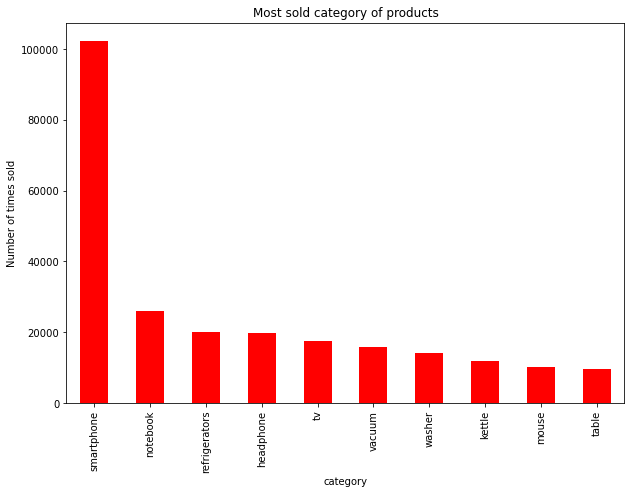

In [29]:
fig = plt.figure(figsize =(10, 7))

data2.plot.bar(x='category',color = 'red')
plt.ylabel("Number of times sold")
plt.title("Most sold category of products")

**From the above barplot Smartphone was the product that was sold the most. The second most product sold was Notebook. The barplot shows the first 10 most sold products from the store.**

**Visualizing the most famous brands bought by the customers.**

In [30]:
data3 = data1.groupby('brand')['order_id'].count().sort_values(ascending = False).head(10)
data3

brand
samsung    89988
apple      34899
ava        20443
lg         16351
tefal      14469
xiaomi     12027
huawei      9945
bosch       9415
asus        9099
philips     7990
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Most popular brands in the store')

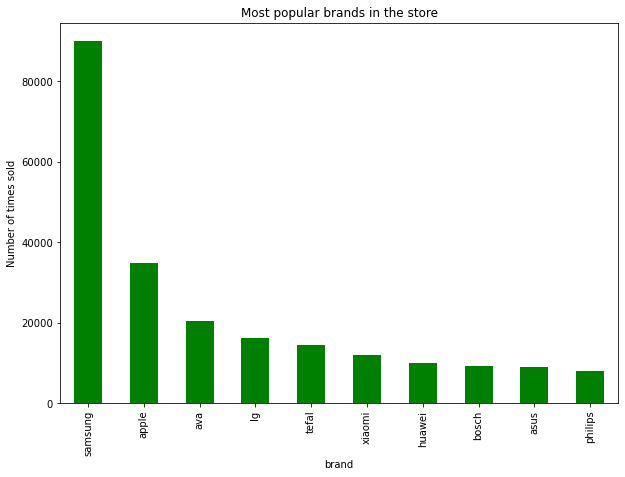

In [31]:
plt.figure(figsize=(10, 7))

data3.plot.bar(x='Popular Brands', color = 'green')
plt.ylabel("Number of times sold")
plt.title("Most popular brands in the store")

**The barplot shows that Samsung was the brand that is sold most than all the other brands in the store.**

In [59]:
best_month = data1.groupby(data1['event_time'].dt.strftime('%B'))['price'].sum().sort_values(ascending = False)

Text(0.5, 1.0, 'Best Month when more products are sold ')

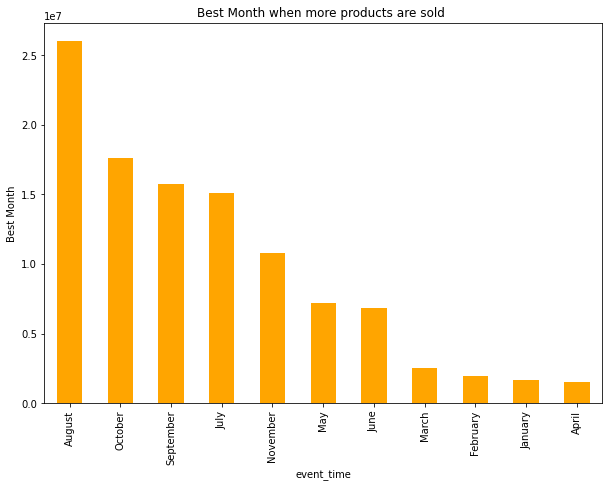

In [61]:
plt.figure(figsize=(10, 7))

best_month.plot.bar(x='orer_id', color = 'orange')
plt.ylabel("Best Month")
plt.title("Best Month when more products are sold ")

**The output shows that most of the products were sold on the month of August. This may be because of the Sale announced in the store or some important event happened in the store may be the reason for more sale in this month.** 